In [2]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [3]:
importlib.reload(EyeTraumaAnalysis);

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import cv2

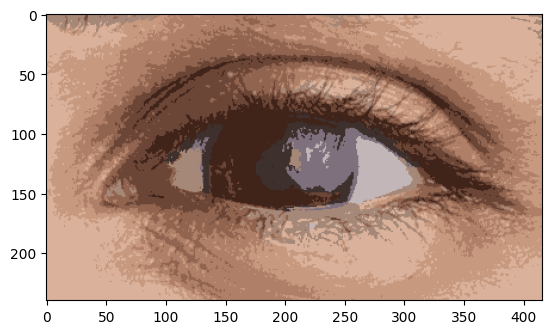

In [51]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
img_bgr = image.img
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
Z_hsv = img_hsv.reshape((-1,3))
# convert to np.float32
Z_hsv = np.float32(Z_hsv)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
ret,label,centers=cv2.kmeans(Z_hsv,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
centers = np.uint8(centers)
res_hsv = centers[label.flatten()]
res_hsv2 = res_hsv.reshape((img_hsv.shape))
res_bgr = cv2.cvtColor(res_hsv2, cv2.COLOR_HSV2BGR)
# res2 = cv2.cvtColor(res2, cv2.COLOR_RGB2GRAY)
plt.imshow(res_bgr, vmin=0, vmax=255)

11284


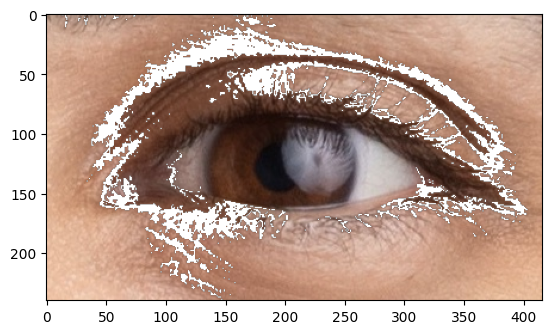

In [57]:
skin_threshold = cv2.inRange(res_hsv2,centers[7],centers[7])
#skin_threshold = np.zeros(skin_threshold.shape[0:3], dtype="uint8")
#skin_threshold[] == 1
#skin_threshold = (cv2.cvtColor(segmented_image[:,:,:3], cv2.COLOR_BGR2HSV)==centers[6]).astype(np.int64)
target1 = cv2.bitwise_and(image.img, image.img, mask=~skin_threshold)
print(np.count_nonzero(skin_threshold))
plt.imshow(target1)

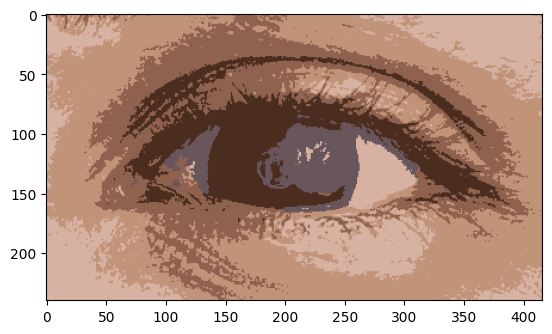

In [104]:

image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
img_bgr = image.img
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
Z_hsv = img_hsv.reshape((-1, 3))
# convert to np.float32
Z_hsv = np.float32(Z_hsv)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
ret, label, centers = cv2.kmeans(Z_hsv, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
centers = np.uint8(centers)
res_hsv = centers[label.flatten()]
res_hsv2 = res_hsv.reshape((img_hsv.shape))
res_bgr = cv2.cvtColor(res_hsv2, cv2.COLOR_HSV2BGR)

In [108]:
centers

array([[112, 158,  62],
       [110, 110, 157],
       [130,  16, 190],
       [  3,  50,  70],
       [111, 127, 109],
       [146,  30, 115],
       [109,  95, 191],
       [125,  85,  63],
       [109,  76, 216],
       [112,  69, 156]], dtype=uint8)

array([[112, 158,  62],
       [125,  85,  63],
       [  3,  50,  70],
       [111, 127, 109],
       [146,  30, 115],
       [112,  69, 156],
       [110, 110, 157],
       [130,  16, 190],
       [109,  95, 191],
       [109,  76, 216]], dtype=uint8)

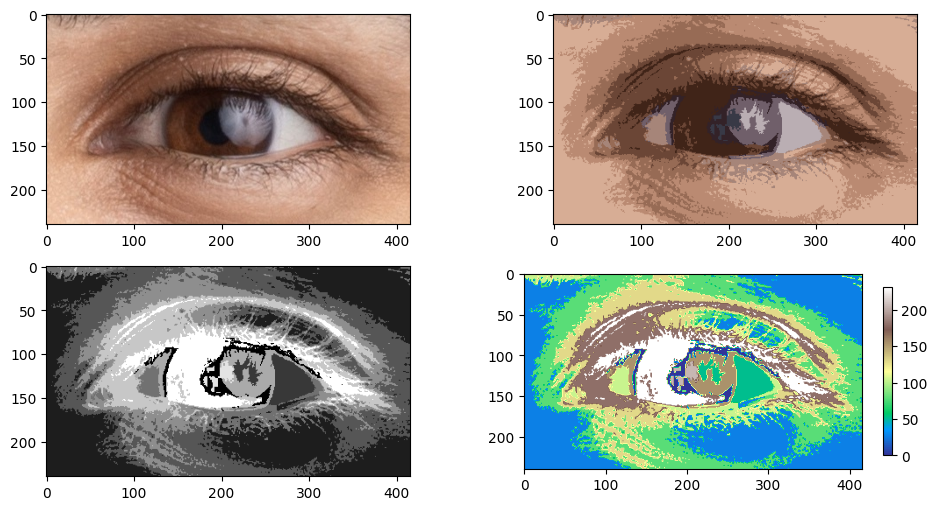

In [110]:
image = EyeTraumaAnalysis.Image("data/01_raw/11000.jpg")
img_bgr = image.img
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
Z_hsv = img_hsv.reshape((-1,3))
# convert to np.float32
Z_hsv = np.float32(Z_hsv)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
ret,label,centers=cv2.kmeans(Z_hsv,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
centers = np.uint8(centers)
res_hsv = centers[label.flatten()]
res_hsv2 = res_hsv.reshape(img_hsv.shape)
res_bgr = cv2.cvtColor(res_hsv2, cv2.COLOR_HSV2BGR)
# res2 = cv2.cvtColor(res2, cv2.COLOR_RGB2GRAY)


# sort centers by HSV "value" - aka sort by grascale
centers_sorted = centers[centers[:, 2].argsort()]
kmeans_thresholds = []
for ind in range(K):
    kmeans_thresholds.append(cv2.inRange(res_hsv2,centers_sorted[ind],centers_sorted[ind]))
summed_image = np.zeros(kmeans_thresholds[0].shape)
for ind in range(K):
    summed_image += int(ind/K*255) * kmeans_thresholds[ind]

fig, axs = plt.subplots(2, 2, figsize=(12,6))
im0=axs.flat[0].imshow(img_bgr)
im1=axs.flat[1].imshow(res_bgr)
im2=axs.flat[2].imshow(summed_image, cmap="gray")
im3=axs.flat[3].imshow(summed_image, cmap="terrain")
plt.colorbar(im3,ax=axs.flat[3], shrink=0.8)

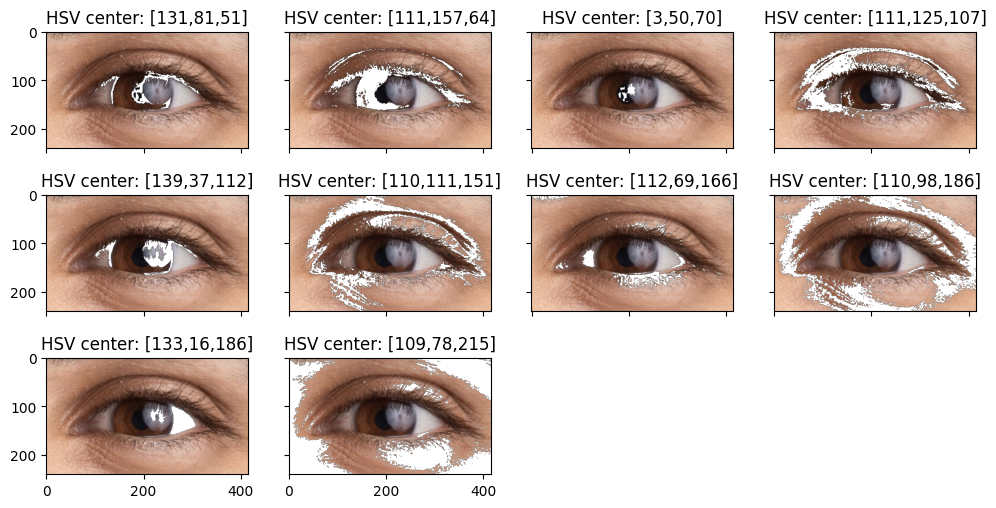

In [126]:
row_ct = int(np.sqrt(K))
col_ct = int(np.ceil(K/row_ct))
fig, axs = plt.subplots(row_ct, col_ct, figsize=(12,6), sharex=True, sharey=True)
for ind in range(row_ct*col_ct):
    if ind < K:
        target1 = cv2.bitwise_and(image.img,image.img, mask=~kmeans_thresholds[ind])
        axs.flat[ind].imshow(target1)
        axs.flat[ind].set_title(
            f"HSV center: [{centers_sorted[ind,0]},{centers_sorted[ind,1]},{centers_sorted[ind,2]}]" )
        #axs.flat[ind].imshow(kmeans_thresholds[ind], cmap="gray")
    else:
        # remove axes for empty cells
        axs.flat[ind].axis("off")


In [127]:
import scipy as sp
import scipy.ndimage
sp.ndimage.center_of_mass(kmeans_thresholds[0])

(116.17012048192771, 208.2602409638554)

In [128]:
# Find indices where we have mass
mass_x, mass_y = np.where(kmeans_thresholds[0] >= 0)
# mass_x and mass_y are the list of x indices and y indices of mass pixels
cent_x = np.average(mass_x)
cent_y = np.average(mass_y)

In [ ]:
np.average(mass_x

In [130]:
cent_x, cent_y

(119.5, 207.5)

In [131]:
kmeans_thresholds[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [132]:
np.max(kmeans_thresholds[0])

255